**UE 4268 - Examen 2023**

**MIMBOE MVOGO MARIE LOUISE**, 18Y457 et louisemimboe@facsciences.com

Department of Physics - Faculty of Science - University of Yaoundé I

PMB

19 juin 2023

In [ ]:
from IPython.display import Image

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous.
 
1. Expliquer pourquoi on dit que c'est un **algorithme hybride** en indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle son influence dans les algorithmes du VQE?

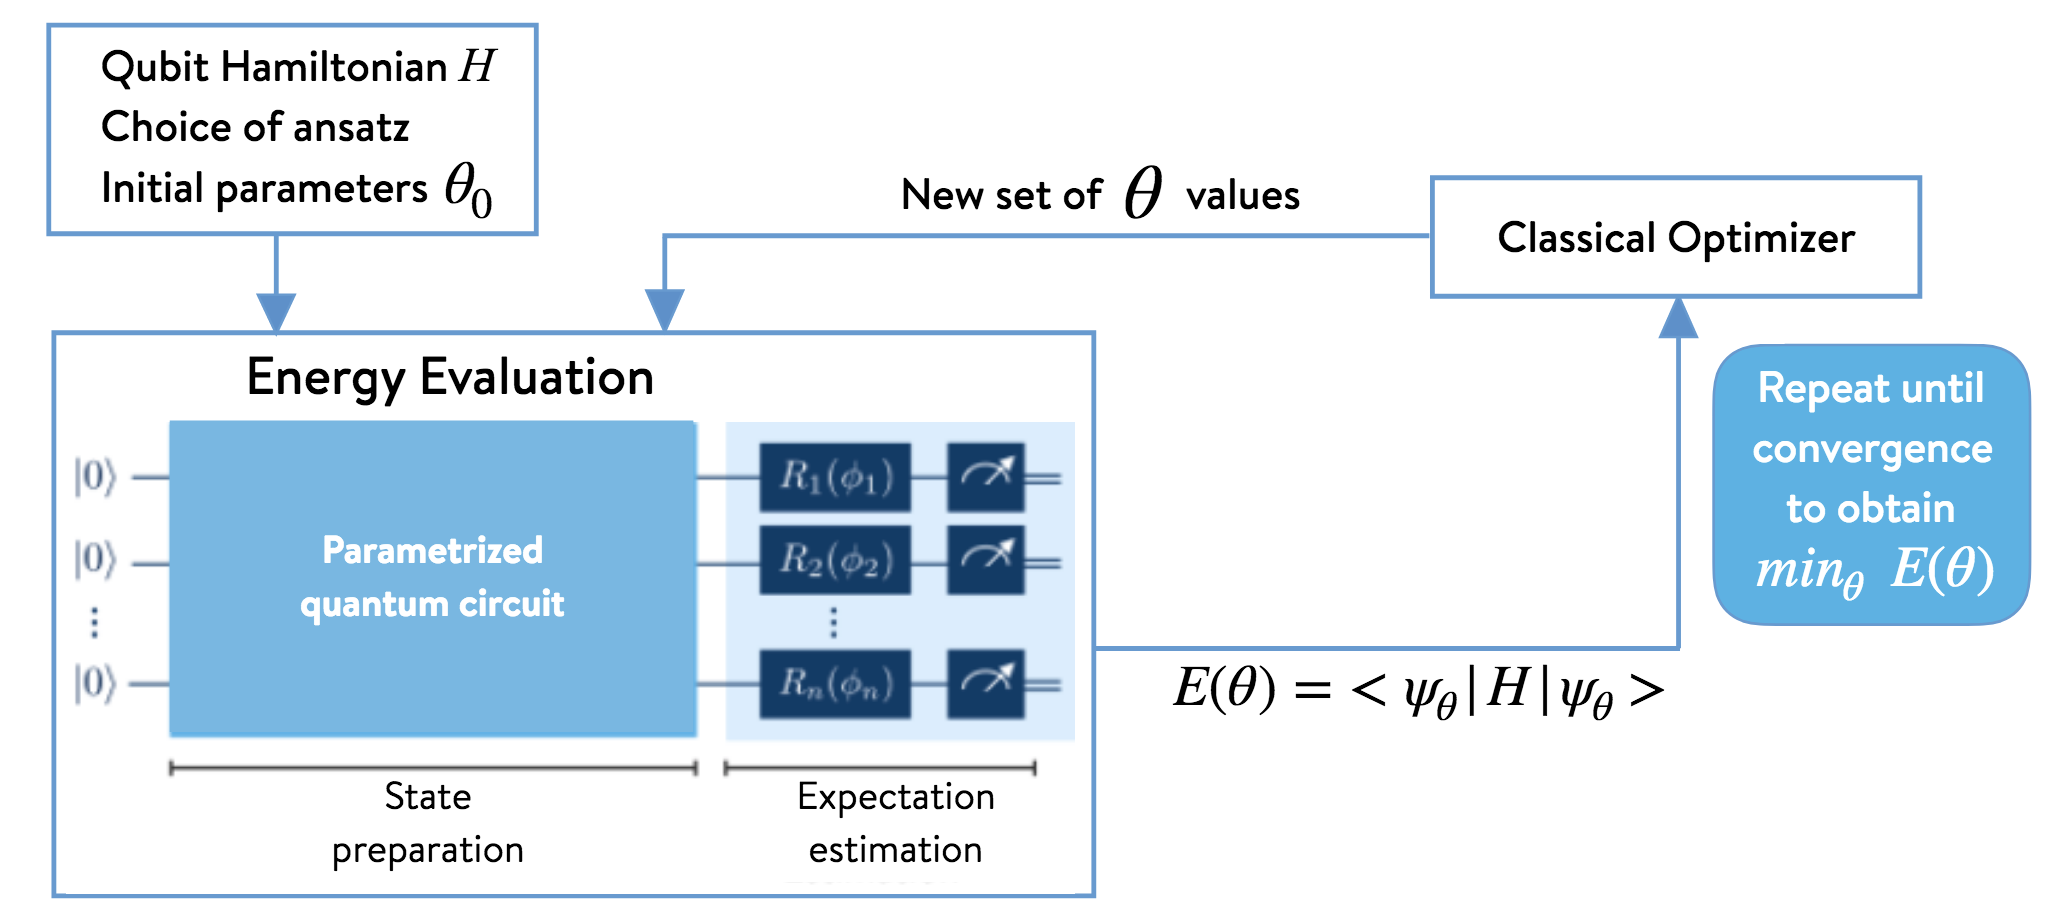

In [2]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [2]:
import sklearn
print(sklearn.__version__)

1.2.1


In [3]:
import rdkit
print(rdkit.__version__)

2023.03.1


1. Get molecular fingerprints of each molecule

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

In [8]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Zn10.txt')

In [13]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
smile

['NC(=O)C1CCCCC1C(F)(F)F',
 'CCCCCNC(=O)N1CCCC1CO',
 'CCC(CC)c1cc(C[NH3+])on1',
 'C[NH2+]C1CCC(c2ccccc2Cl)C1',
 'COc1ccc2c(c1)C(C(C)[NH3+])CN2C',
 'CC1C[NH2+]CCN1CCCc1ccco1',
 'Cc1ccc(S(=O)(=O)C2CC[NH2+]C2)cc1C',
 'COc1cc(C(N)C(F)(F)F)ccc1C(=O)[O-]',
 'Nc1cc(C2CCC[NH2+]2)ccc1O',
 'CN(C)S(=O)(=O)N1CC2CC1C(=O)O2',
 'CC(O)CC[NH2+]C(C)(C)C',
 'C=CC(C)OC(C)CC(=O)[O-]',
 'N#Cc1ccc2cc(C#N)ccc2c1',
 'Cc1ccc(O)c(C2(C)CCCO2)c1',
 'Cc1ccc(C)c2c1CC[NH2+]C2CC(O)C(=O)[O-]',
 'c1cc(C2NCCc3ccc4c(c32)OCO4)co1',
 '[NH3+]CCCn1c(CCO)nc2cccnc21',
 'CC([NH3+])C1CCCc2c1nc(C(F)(F)F)n2C',
 'CC(C)n1c(C2CCC[NH2+]C2)[nH+]c2c1CCCC2',
 'Cc1cc([O-])c2nnc(CC([NH3+])C(=O)[O-])n2n1',
 'C[NH+](C)CC(CC[NH3+])c1ccc(Cl)cc1',
 'CCc1ccc(-c2cnnc([O-])c2C#N)cc1',
 'Cc1cc(C(N)=[NH2+])c(C2CC2)o1',
 'CCCCN(C)c1nccc(C(=O)[O-])n1',
 'CC(C)(C[NH3+])C(=O)Nc1cccc(Cl)c1',
 'CC(=CC(=O)NCC1CC1)c1ccccc1',
 'CCNC(=O)N(CC)C(C)c1ccc(C#N)cc1',
 'CNC(=O)c1cc(O)c2ccc(OC)cc2c1',
 'CCC(CO)Nc1nc(C)c(C)c(Cl)n1',
 'Cc1ccsc1-c1c[nH]cc1C[NH3+]',
 'Cc1

In [14]:
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

,Smiles
0,NC(=O)C1CCCCC1C(F)(F)F
1,CCCCCNC(=O)N1CCCC1CO
2,CCC(CC)c1cc(C[NH3+])on1
3,C[NH2+]C1CCC(c2ccccc2Cl)C1
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997,CCCC[NH2+]C1CCc2ccccc21
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C


,Smiles,Molecules
0,NC(=O)C1CCCCC1C(F)(F)F,
1,CCCCCNC(=O)N1CCCC1CO,
2,CCC(CC)c1cc(C[NH3+])on1,
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,
...,...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1,
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC,
5997,CCCC[NH2+]C1CCc2ccccc21,
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C,

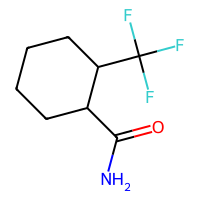
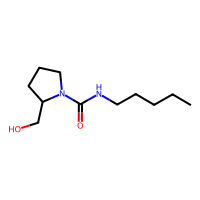
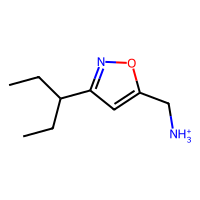
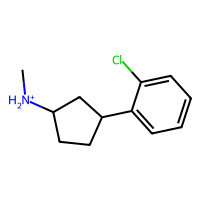
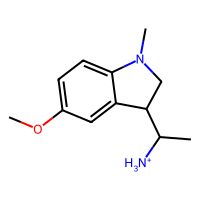
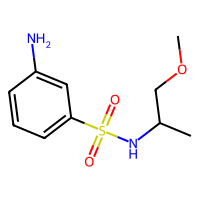
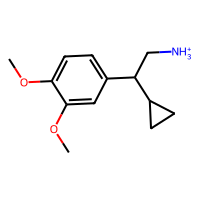
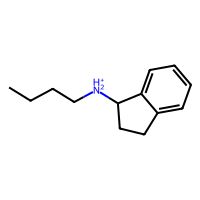
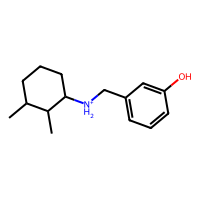
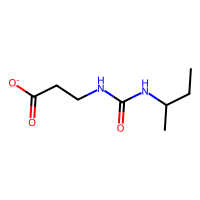

In [15]:
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

In [16]:
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [43]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [44]:
molecule = df.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

In [19]:
descriptors_df = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df, descriptors_df], axis=1)
data

,Smiles,Molecules,MW,LogP,HBD,HBA,PSA,Aromatic Rings,Rotatable Bonds,QED
0,NC(=O)C1CCCCC1C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fbb7886d230>,195.184,1.8404,1,1,43.09,0,1,0.681153
1,CCCCCNC(=O)N1CCCC1CO,<rdkit.Chem.rdchem.Mol object at 0x7fbb7886de70>,214.309,1.3429,2,2,52.57,0,5,0.678579
2,CCC(CC)c1cc(C[NH3+])on1,<rdkit.Chem.rdchem.Mol object at 0x7fbb7886dd20>,169.248,1.3201,1,2,53.67,1,4,0.738657
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,<rdkit.Chem.rdchem.Mol object at 0x7fbb7886e180>,210.728,2.1693,1,0,16.61,1,2,0.770859
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,<rdkit.Chem.rdchem.Mol object at 0x7fbb7886e1f0>,207.297,0.8590,1,2,40.11,1,2,0.781030
...,...,...,...,...,...,...,...,...,...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1,<rdkit.Chem.rdchem.Mol object at 0x7fbb78273610>,244.316,0.5820,2,4,81.42,1,5,0.742397
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC,<rdkit.Chem.rdchem.Mol object at 0x7fbb78273680>,222.308,1.4393,1,2,46.10,1,5,0.819062
5997,CCCC[NH2+]C1CCc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7fbb782736f0>,190.310,2.0374,1,0,16.61,1,4,0.699701
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C,<rdkit.Chem.rdchem.Mol object at 0x7fbb78273760>,234.363,2.2803,2,1,36.84,1,3,0.826891


In [20]:
data.isnull().sum()

Smiles             0
Molecules          0
MW                 0
LogP               0
HBD                0
HBA                0
PSA                0
Aromatic Rings     0
Rotatable Bonds    0
QED                0
dtype: int64

In [21]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)

In [22]:

fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

2. Split the dataset to training set and test set

In [91]:
PSA = data.iloc[:,6].values

In [92]:
PSA.shape[0] == fps.shape[0]

True

In [93]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, PSA, train_size=0.8, random_state=seed)

3. Train a SVR model

In [48]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

4. Check the accuracy of prediction with $R²$ and mean-square error

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

PSA_predict = svr.predict(X_test)
 r2  =  r2 _score(y_test, PSA_predict)
mse = mean_squared_error(y_test, PSA_predict)

print('The  r2 _score is {} '.format( r2 ),'and the mean square error is {}'.format(mse))


IndentationError: unexpected indent (3320921737.py, line 4)

In [90]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, PSA_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, PSA_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True PSA +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True PSA')
plt.ylabel('Predicted PSA')
plt.legend()
plt.show()
# pour visualiser

NameError: name 'PSA_predict' is not defined

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

In [ ]:
# Put your code here

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et 
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

In [ ]:
# Put your code here

# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

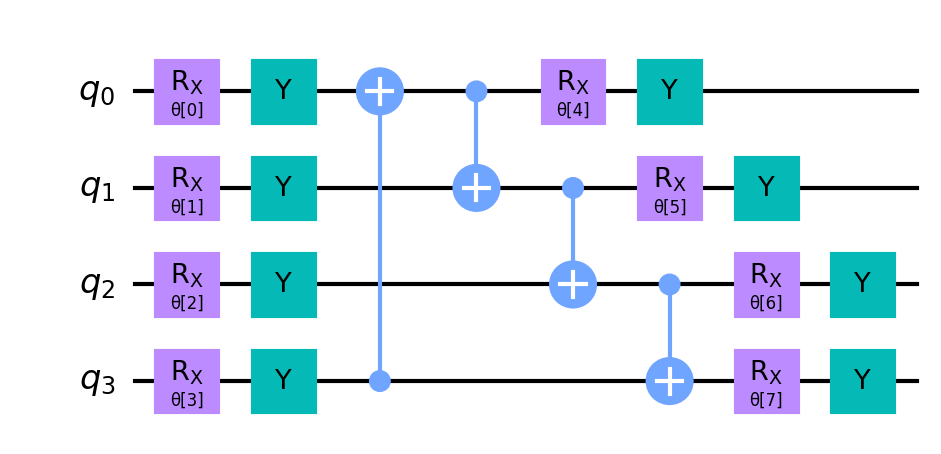

In [51]:
Image(filename='./SU2_Ansatz.png', width=400)

In [69]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit import Parameter
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.quantum_info import Statevector
from math import pi
backend = BasicAer.get_backend('unitary_simulator')
import matplotlib.pyplot as plt
from qiskit.quantum_info.operators import Operator, Pauli

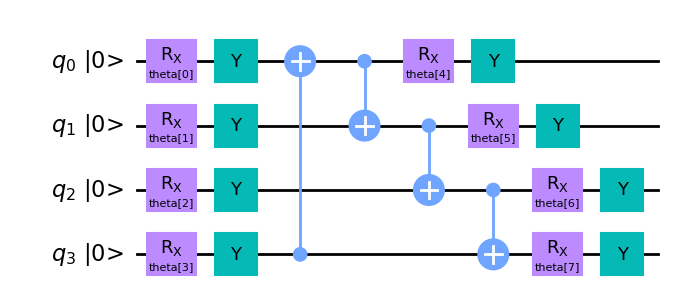

In [70]:
parameter_0 = Parameter('theta[0]')
parameter_1 = Parameter('theta[1]')
parameter_2 = Parameter('theta[2]')
parameter_3 = Parameter('theta[3]')
parameter_4 = Parameter('theta[4]')
parameter_5 = Parameter('theta[5]')
parameter_6 = Parameter('theta[6]')
parameter_7 = Parameter('theta[7]')
circuitQ = QuantumCircuit(4)
circuitQ.rx(theta = parameter_0,qubit = 0)
circuitQ.rx(theta = parameter_1,qubit = 1)
circuitQ.rx(theta = parameter_2,qubit = 2)
circuitQ.rx(theta = parameter_3,qubit = 3)
circuitQ.y(0)
circuitQ.y(1)
circuitQ.y(2)
circuitQ.y(3)
circuitQ.cx([3],[0])
circuitQ.cx([0],[1])
circuitQ.cx([1],[2])
circuitQ.cx([2],[3])
circuitQ.rx(theta = parameter_4,qubit = 0)
circuitQ.rx(theta = parameter_5,qubit = 1)
circuitQ.rx(theta = parameter_6,qubit = 2)
circuitQ.rx(theta = parameter_7,qubit = 3)
circuitQ.y(0)
circuitQ.y(1)
circuitQ.y(2)
circuitQ.y(3)



circuitQ.draw('mpl',initial_state=True)

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [79]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

In [80]:
H2_driver = PySCFDriver(
    atom="H 0 0 -0.3625; H 0 0 0.3625",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [81]:
from qiskit_nature.second_q.mappers import (
    ParityMapper,
    JordanWignerMapper,
    BravyiKitaevMapper, 
    QubitConverter
)
def qubit_converter(mapper):
    """A mapper instance used to convert second quantized to qubit operators

    Args:
        mapper : Mapper string that can be "PM" or "JWM" or "BKM"
                
    Returns: The QubitConverter instance
    """    
    return QubitConverter(mapper)

def ansatz(converter):
    
    ansatz = SU2ansatz(
        circuitQ,
        (theta,
            
        ),
    )
    return ansatz

In [82]:
from qiskit.primitives import Estimator 

estimator = Estimator()

In [83]:
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B

In [84]:
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np
#permet d calculer l'energie
def vqe_solver(converter, optimizer):# le mapper ici on choisi ce qu'on veut mettre on peut mettre jw; bk
    
    vqe_solver = VQE(estimator, circuitQ, optimizer)
# par exemple si on veut plutot utiliser le circuit on remplace ansatz par le circuit
    #vqe_solver.initial_point = np.zeros(ansatz(converter).num_parameters)
    return vqe_solver

In [85]:
def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    
    # Mapper
    dmap = {"JWM": JordanWignerMapper(), "PM": ParityMapper(),  "BKM": BravyiKitaevMapper()}
    for k, v in dmap.items():
        if k == mapper:        
            q_conv = qubit_converter(v)   
            
    if solver == "VQE":             
        # Optimizer
        dopt = {"SPSA": SPSA(), "SLSQP": SLSQP(), "L_BFGS_B": L_BFGS_B()}
        for n, m in dopt.items():
            if n == optimizer:        
                opt = m
        GS_solver = vqe_solver(q_conv, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    Algo = GroundStateEigensolver(q_conv, GS_solver) 
    
    # Leveraging Qiskit Runtime
    start = time.time()
    
    # Compute Ground State properties.
    ground_state = Algo.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))
    
    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(ground_state.total_energies[0])

    if solver == "VQE":
        return ground_state, elapsed, mapper, solver, optimizer
    else:
        return ground_state, elapsed, mapper, solver


In [86]:
from qiskit import QuantumCircuit
from qiskit.circuit import parameter
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime

res_vqe = run_vqe(H2_problem, mapper="PM", optimizer="SLSQP", solver="VQE")

/tmp/ipykernel_125025/2946544623.py:15: DeprecationWarning: The QubitConverter class is deprecated as of version 0.6.0 and will be removed no sooner than 3 months after the release . Instead you should directly use the QubitMapper instance which you used to pass into the QubitConverter as the first argument. Refer to the documentation of the qiskit_nature.second_q.mappers module for more information.
  return QubitConverter(mapper)
/home/mimboe/anaconda3/lib/python3.10/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


Running VQE and PM mapper
With SLSQP optimizer and UCCSD ansatz
Elapsed time: 0:00:05.292646 

-1.117342613377091
